<a href="https://colab.research.google.com/github/palash9213/Stock-Market-Prediction/blob/main/Stock_Market_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Stock price prediction is a machine learning project for beginners; in this tutorial we learned how to develop a stock cost prediction model and how to build an interactive dashboard for stock analysis. We implemented stock market prediction using the LSTM model. OTOH, Plotly dash python framework for building dashboards.

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt




In [8]:
import pandas as pd
df= pd.read_csv('/content/TSLA.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


In [9]:
print(df.head(25))

          Date       Open       High        Low      Close  Adj Close    Volume
0   2010-06-29  19.000000  25.000000  17.540001  23.889999  23.889999  18766300
1   2010-06-30  25.790001  30.420000  23.299999  23.830000  23.830000  17187100
2   2010-07-01  25.000000  25.920000  20.270000  21.959999  21.959999   8218800
3   2010-07-02  23.000000  23.100000  18.709999  19.200001  19.200001   5139800
4   2010-07-06  20.000000  20.000000  15.830000  16.110001  16.110001   6866900
5   2010-07-07  16.400000  16.629999  14.980000  15.800000  15.800000   6921700
6   2010-07-08  16.139999  17.520000  15.570000  17.459999  17.459999   7711400
7   2010-07-09  17.580000  17.900000  16.549999  17.400000  17.400000   4050600
8   2010-07-12  17.950001  18.070000  17.000000  17.049999  17.049999   2202500
9   2010-07-13  17.389999  18.639999  16.900000  18.139999  18.139999   2680100
10  2010-07-14  17.940001  20.150000  17.760000  19.840000  19.840000   4195200
11  2010-07-15  19.940001  21.500000  19

In [10]:
x=df[['High','Open','Low','Volume']].values
y=df[['Close']].values  


In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [12]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
y_pred = regressor.predict(x_test)
result = pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_pred.flatten()})
result.head(25)

,Actual,Predicted
0,207.729996,211.933274
1,28.280001,28.343446
2,24.010000,23.967470
3,315.230011,326.638890
4,200.240005,197.999511
5,210.240005,209.841431
6,26.440001,26.570540
7,22.790001,24.115965
8,224.839996,218.550465
9,353.179993,350.599448


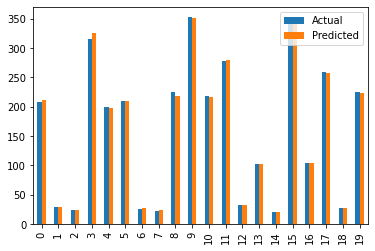

In [18]:
import math
graph=result.head(20)
graph.plot(kind='bar')

In [19]:
#Get the number of trading days
df.shape

(2416, 7)

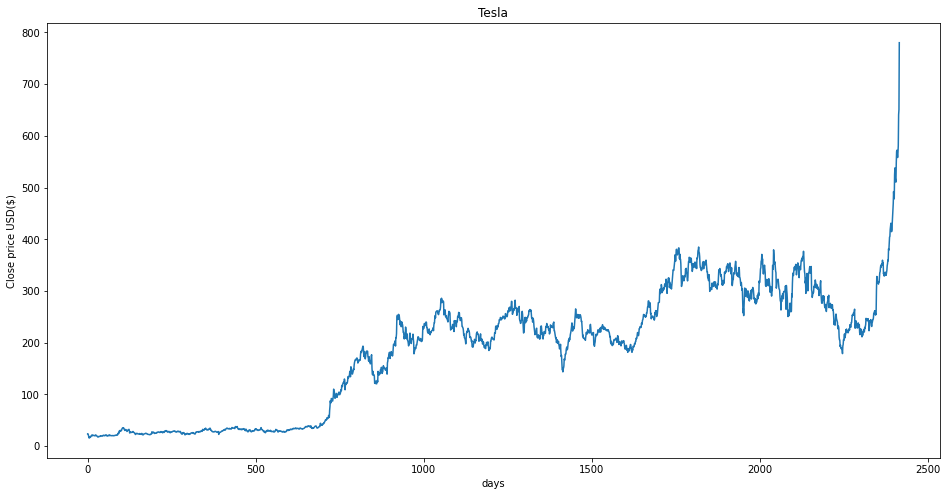

In [20]:
plt.figure(figsize=(16,8))
plt.title('Tesla')
plt.xlabel('days')
plt.ylabel('Close price USD($)')
plt.plot(df['Close'])
plt.show()

In [21]:
df=df[['Close']]
df.head(4)

,Close
0,23.889999
1,23.830000
2,21.959999
3,19.200001


In [22]:
#Create a variable to predict 'X' days out into the future
future_days=25
df['Prediction']=df[['Close']].shift(-future_days)
df.tail(4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Close,Prediction
2412,580.989990,NaN
2413,640.809998,NaN
2414,650.570007,NaN
2415,780.000000,NaN


In [23]:
x=np.array(df.drop(['Prediction'],1))[:-future_days]
print(x)

[[ 23.889999]
 [ 23.83    ]
 [ 21.959999]
 ...
 [419.220001]
 [425.25    ]
 [430.940002]]


In [24]:
y=np.array(df.drop(['Prediction'],1))[:-future_days]
print(y)

[[ 23.889999]
 [ 23.83    ]
 [ 21.959999]
 ...
 [419.220001]
 [425.25    ]
 [430.940002]]


In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [27]:
x_future=df.drop(['Prediction'],1)[:-future_days]
x_future=x_future.tail(future_days)
x_future=np.array(x_future)
x_future

array([[352.220001],
       [354.829987],
       [333.040009],
       [336.339996],
       [328.920013],
       [331.290009],
       [329.940002],
       [334.869995],
       [336.200012],
       [333.029999],
       [330.369995],
       [335.890015],
       [339.529999],
       [348.839996],
       [352.700012],
       [359.679993],
       [358.390015],
       [381.5     ],
       [378.98999 ],
       [393.149994],
       [404.040009],
       [405.589996],
       [419.220001],
       [425.25    ],
       [430.940002]])

In [28]:
lr=LinearRegression().fit(x_train,y_train)

In [29]:
lr_prediction=lr.predict(x_future)
print(lr_prediction)

[[352.220001]
 [354.829987]
 [333.040009]
 [336.339996]
 [328.920013]
 [331.290009]
 [329.940002]
 [334.869995]
 [336.200012]
 [333.029999]
 [330.369995]
 [335.890015]
 [339.529999]
 [348.839996]
 [352.700012]
 [359.679993]
 [358.390015]
 [381.5     ]
 [378.98999 ]
 [393.149994]
 [404.040009]
 [405.589996]
 [419.220001]
 [425.25    ]
 [430.940002]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


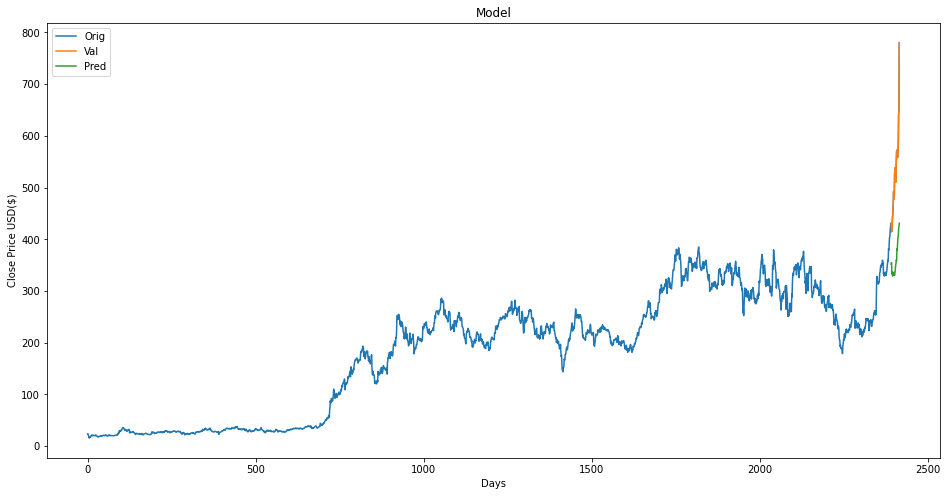

In [31]:
predictions=lr_prediction
valid=df[x.shape[0]:]
valid['Prediction']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD($)')
plt.plot(df['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(['Orig','Val','Pred'])
plt.show()